# Predicting Credit Card Approvals
 

## Maria Yasin
## 18716929

In [235]:
#Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf 
from sklearn. impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Task 1

In [236]:
#Load the dataset
cc_data = pd.read_csv('cc_approvals.data')
cc_data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [237]:
#Data description and summary statistics
cc_data.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


### Task 2

In [238]:
#Remove unnecessary columns
cc_data = cc_data.drop(columns = ['DriversLicense','ZipCode'])

### Task 3

In [239]:
#Check for the columns with 0s
(cc_data.eq(0)).any()

Gender            False
Age               False
Debt               True
Married           False
BankCustomer      False
EducationLevel    False
Ethnicity         False
YearsEmployed      True
PriorDefault      False
Employed          False
CreditScore        True
Citizen           False
Income             True
Approved          False
dtype: bool

In [240]:
#Replace all the 0s with NaNs
cc_data = cc_data.replace(0, np.nan)

In [241]:
#Replace all NaN values with mean 
cc_data = cc_data.fillna(cc_data[['Debt', 'YearsEmployed', 'CreditScore', 'Income']].mean())
cc_data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,b,30.83,4.893472,u,g,w,v,1.25,t,t,1.000000,g,1777.205063,+
1,a,58.67,4.460000,u,g,q,h,3.04,t,t,6.000000,g,560.000000,+
2,a,24.50,0.500000,u,g,q,h,1.50,t,f,5.613559,g,824.000000,+
3,b,27.83,1.540000,u,g,w,v,3.75,t,t,5.000000,g,3.000000,+
4,b,20.17,5.625000,u,g,w,v,1.71,t,f,5.613559,s,1777.205063,+


### Task 4

In [242]:
#Check for the columns with '?'
(cc_data.eq('?')).any()

Gender             True
Age                True
Debt              False
Married            True
BankCustomer       True
EducationLevel     True
Ethnicity          True
YearsEmployed     False
PriorDefault      False
Employed          False
CreditScore       False
Citizen           False
Income            False
Approved          False
dtype: bool

In [243]:
#Replace all the ?s with NaNs
cc_data = cc_data.replace('?', np.nan)

In [244]:
cc_data.isnull().values.any()

True

In [245]:
#Replace all NaN values with most frequent for Gender column  
imputer_gender = SimpleImputer( strategy='most_frequent')
imputer_gender = imputer_gender.fit(cc_data[['Gender']]) 
cc_data['Gender'] = imputer_gender.transform(cc_data[['Gender']].values)

C:\Users\35383\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [246]:
#Replace all NaN values with most frequent for Married column  
imputer_Married = SimpleImputer( strategy='most_frequent')
imputer_Married = imputer_Married.fit(cc_data[['Married']]) 
cc_data['Married'] = imputer_Married.transform(cc_data[['Married']].values)

C:\Users\35383\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [247]:
#Replace all NaN values with most frequent for BankCustomer column 
imputer_BankCustomer = SimpleImputer( strategy='most_frequent')
imputer_BankCustomer = imputer_BankCustomer.fit(cc_data[['BankCustomer']]) 
cc_data['BankCustomer'] = imputer_BankCustomer.transform(cc_data[['BankCustomer']].values)

C:\Users\35383\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [248]:
#Replace all NaN values with most frequent for EducationLevel column 
imputer_EducationLevel = SimpleImputer( strategy='most_frequent')
imputer_EducationLevel = imputer_EducationLevel.fit(cc_data[['EducationLevel']]) 
cc_data['EducationLevel'] = imputer_EducationLevel.transform(cc_data[['EducationLevel']].values)

C:\Users\35383\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [249]:
#Replace all NaN values with most frequent for Ethnicity column 
imputer_Ethnicity = SimpleImputer( strategy='most_frequent')
imputer_Ethnicity = imputer_Ethnicity.fit(cc_data[['Ethnicity']]) 
cc_data['Ethnicity'] = imputer_Ethnicity.transform(cc_data[['Ethnicity']].values)

C:\Users\35383\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [250]:
#Replace all NaN values with most frequent for Age column 
imputer_Age = SimpleImputer( strategy='most_frequent')
imputer_Age = imputer_Age.fit(cc_data[['Age']]) 
cc_data['Age'] = imputer_Age.transform(cc_data[['Age']].values)

C:\Users\35383\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [251]:
#Check for any na values again
cc_data.isnull().values.any()

False

In [252]:
#cleaned dataframe
cc_data

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,b,30.83,4.893472,u,g,w,v,1.25,t,t,1.000000,g,1777.205063,+
1,a,58.67,4.460000,u,g,q,h,3.04,t,t,6.000000,g,560.000000,+
2,a,24.50,0.500000,u,g,q,h,1.50,t,f,5.613559,g,824.000000,+
3,b,27.83,1.540000,u,g,w,v,3.75,t,t,5.000000,g,3.000000,+
4,b,20.17,5.625000,u,g,w,v,1.71,t,f,5.613559,s,1777.205063,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085000,y,p,e,h,1.25,f,f,5.613559,g,1777.205063,-
686,a,22.67,0.750000,u,g,c,v,2.00,f,t,2.000000,g,394.000000,-
687,a,25.25,13.500000,y,p,ff,ff,2.00,f,t,1.000000,g,1.000000,-
688,b,17.92,0.205000,u,g,aa,v,0.04,f,f,5.613559,g,750.000000,-


In [253]:
cc_data.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore       float64
Citizen            object
Income            float64
Approved           object
dtype: object

#### Converting categorical variables to numerical for logistic regression

In [254]:
cc_data['Gender'] = cc_data['Gender'].astype('category')
cc_data['Gender'] = cc_data['Gender'].cat.codes

In [255]:
cc_data['Married'] = cc_data['Married'].astype('category')
cc_data['Married'] = cc_data['Married'].cat.codes

In [256]:
cc_data['BankCustomer'] = cc_data['BankCustomer'].astype('category')
cc_data['BankCustomer'] = cc_data['BankCustomer'].cat.codes

In [257]:
cc_data['EducationLevel'] = cc_data['EducationLevel'].astype('category')
cc_data['EducationLevel'] = cc_data['EducationLevel'].cat.codes

In [258]:
cc_data['Ethnicity'] = cc_data['Ethnicity'].astype('category')
cc_data['Ethnicity'] = cc_data['Ethnicity'].cat.codes

In [259]:
cc_data['PriorDefault'] = cc_data['PriorDefault'].astype('category')
cc_data['PriorDefault'] = cc_data['PriorDefault'].cat.codes

In [260]:
cc_data['Employed'] = cc_data['Employed'].astype('category')
cc_data['Employed'] = cc_data['Employed'].cat.codes

In [261]:
cc_data['Citizen'] = cc_data['Citizen'].astype('category')
cc_data['Citizen'] = cc_data['Citizen'].cat.codes

In [262]:
cc_data['Approved'] = cc_data['Approved'].map({'+': 1, '-': 0})

In [263]:
cc_data['Age'] = cc_data['Age'].astype('float')

In [264]:
cc_data

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,1,30.83,4.893472,1,0,12,7,1.25,1,1,1.000000,0,1777.205063,1
1,0,58.67,4.460000,1,0,10,3,3.04,1,1,6.000000,0,560.000000,1
2,0,24.50,0.500000,1,0,10,3,1.50,1,0,5.613559,0,824.000000,1
3,1,27.83,1.540000,1,0,12,7,3.75,1,1,5.000000,0,3.000000,1
4,1,20.17,5.625000,1,0,12,7,1.71,1,0,5.613559,2,1777.205063,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085000,2,2,4,3,1.25,0,0,5.613559,0,1777.205063,0
686,0,22.67,0.750000,1,0,1,7,2.00,0,1,2.000000,0,394.000000,0
687,0,25.25,13.500000,2,2,5,2,2.00,0,1,1.000000,0,1.000000,0
688,1,17.92,0.205000,1,0,0,7,0.04,0,0,5.613559,0,750.000000,0


In [265]:
cc_data.dtypes

Gender               int8
Age               float64
Debt              float64
Married              int8
BankCustomer         int8
EducationLevel       int8
Ethnicity            int8
YearsEmployed     float64
PriorDefault         int8
Employed             int8
CreditScore       float64
Citizen              int8
Income            float64
Approved            int64
dtype: object

### Task 5

In [266]:
#Looking at the distribution of the categories in the 'Approved' column
cc_data['Approved'].value_counts()

0    383
1    307
Name: Approved, dtype: int64

[Text(0.5, 1.0, 'Countplot of Approved')]

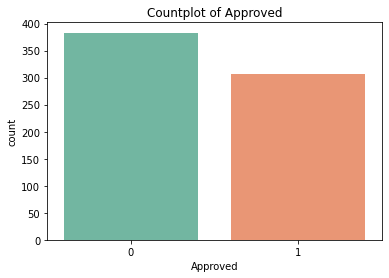

In [267]:
#visualization
sns.countplot(x = 'Approved', data = cc_data, palette = 'Set2').set(title = 'Countplot of Approved')

The count plot helps us easily identify the distribution of each category in the variable. It also helps us see if a variable is normallyy distributed or not. Here 0 refers to credit card not approved and 1 means credit card approved.

#### Training and testing the data for regression

In [335]:
X = cc_data.drop(columns = 'Approved')

In [269]:
Y = cc_data['Approved']

In [313]:
#splitting data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [314]:
#fitting logistic regression model
regressor = LogisticRegression()
regressor.fit(X_train, Y_train)

C:\Users\35383\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [315]:
#Accuracy for training data
print (regressor.score(X_train, Y_train))

0.8571428571428571


We get a score value of 0.86 for our regression model, this means that 86% of the variance in the dependent variable can be explained by the independent variable(s) in the case of training data in our regression model. This is a good result, as it indicates that the model is able to capture the relationship between the predictor variables and the response variable.

In [316]:
#Accuracy for test data
print (regressor.score(X_test, Y_test))

0.7971014492753623


We get a score value of 0.80 for test data in our model, this means 80 % of the variance in the dependent variable can be explained by the independent variable(s) in the test data for our regression model.

In [320]:
# predicting credit card approval
Y_pred = regressor.predict(X_test)

In [331]:
print(Y_pred)

[1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0
 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0]


In [322]:
# finding out the accuracy of the predictions of our model
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7971014492753623


A score of 0.80 for accuracy indicates that 80% of the predictions made by the model are accurate. This is a good enough accuracy score.

In [274]:
#print confusion matrix 
from sklearn.metrics import confusion_matrix

In [297]:
pd.DataFrame(confusion_matrix(Y_test,Y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,102,15
Actual Yes,27,63


In [323]:
#import classification report for better understanding
from sklearn.metrics import classification_report

In [324]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       117
           1       0.81      0.70      0.75        90

    accuracy                           0.80       207
   macro avg       0.80      0.79      0.79       207
weighted avg       0.80      0.80      0.79       207



#### Logistic regression model and summary using training data

In [329]:
#Running the logistic regression on training data using sm.Logit
import statsmodels.api as sm
model = sm.Logit(Y_train,X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.329406
         Iterations 8


In [334]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Approved   No. Observations:                  483
Model:                          Logit   Df Residuals:                      470
Method:                           MLE   Df Model:                           12
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.5212
Time:                        02:11:02   Log-Likelihood:                -159.10
converged:                       True   LL-Null:                       -332.30
Covariance Type:            nonrobust   LLR p-value:                 8.084e-67
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Gender             0.0005      0.320      0.002      0.999      -0.627       0.628
Age               -0.0054      0.014     -0.383      0.702      -0.033       0.022
Debt               0.0200      0.030

Looking at the summary of our regression model, first we will look at our Pseudo R-squared value, a value of 0.52 indicates that our model is a good fit (in the case of training data). 

P-values for some variables are as low as 0, Variables 'Married', 'BankCustomer','Employed','PriorDefault' and 'Income' are statistically significant at 5% as well as 1% significance level, that means these variables are reliable predictors for wether or not a person's credit card will be approved.